# ZADANIE 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej. Przydatne mogą być następujące konstrukcje:
   - array = np.genfromtxt(‘spots.txt’)
   - x = max(array)

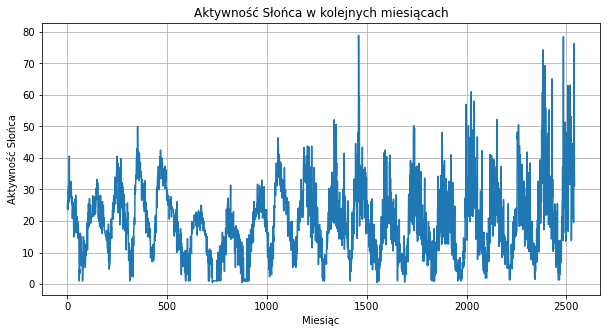

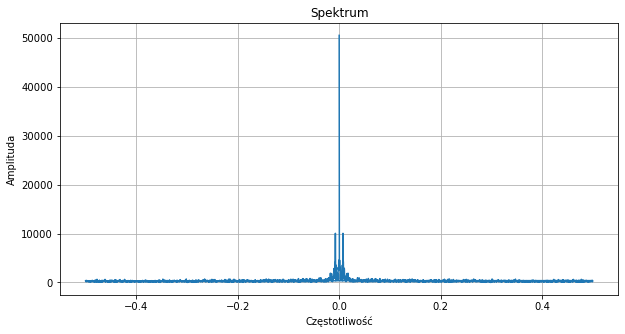

Częstotliwość cyklu: 133.78947368421052


In [15]:
array = np.genfromtxt('spots.txt')

# Wykres sygnału aktywności Słońca
plt.figure(figsize=(10, 5))
plt.plot(array, label='Sygnał aktywności Słońca')
plt.xlabel('Miesiąc')
plt.ylabel('Aktywność Słońca')
plt.title('Aktywność Słońca w kolejnych miesiącach')
plt.grid(True)
plt.show()

# Obliczenie FFT (Fast Fourier Transform)
fft_result = np.fft.fft(array)
freq = np.fft.fftfreq(len(array))

# Wykres amplitudy sygnału
plt.figure(figsize=(10, 5))
plt.plot(freq, np.abs(fft_result))
plt.xlabel('Częstotliwość')
plt.ylabel('Amplituda')
plt.title('Spektrum')
plt.grid(True)
plt.show()

# Znalezienie indeksu największej amplitudy (poza częstotliwością zerową)
max_amp_index = np.argmax(np.abs(fft_result[1:])) + 1

# Obliczenie częstotliwości cyklu aktywności słonecznej
sunspot_cycle_freq = abs(1 / freq[max_amp_index])

print("Częstotliwość cyklu:", sunspot_cycle_freq)

### 2. Proste filtrowanie. Wykreśl sygnał sin(2\*pi\*t) + sin(4\*pi\*t), T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

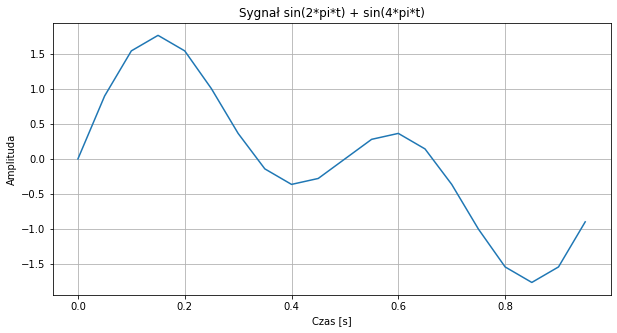

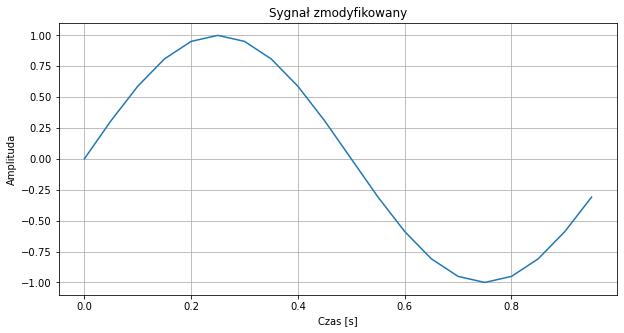

In [19]:
# sygnał sin(2*pi*t) + sin(4*pi*t)
T = 1
fs = 20
t = np.linspace(0, T, int(T * fs), endpoint=False)
signal = np.sin(2 * np.pi * t) + np.sin(4 * np.pi * t)

# wykres sygnału
plt.figure(figsize=(10, 5))
plt.plot(t, signal)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.title('Sygnał sin(2*pi*t) + sin(4*pi*t)')
plt.grid(True)
plt.show()

# obliczanie FFT
fft_result = np.fft.fft(signal)
freq = np.fft.fftfreq(len(signal), 1/fs)

# usunięcie składowych o częstotliwości 2Hz
fft_result[(np.abs(freq) == 2) | (np.abs(freq) == -2)] = 0

# przekształcenie do dziedziny czasu
filtered_signal = np.fft.ifft(fft_result)

plt.figure(figsize=(10, 5))
plt.plot(t, filtered_signal.real)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.title('Sygnał zmodyfikowany')
plt.grid(True)
plt.show()


### 3. Informacja o fazie. Wykreśl sygnał sin(2\*pi\*t) + sin(4\*pi\*t), T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2\*pi\*t) + cos(4\*pi\*t). Porównaj otrzymane wykresy. Przydatne funkcje (działają także dla tablic):
   - atan2(z)
   - z.imag
   - z.real

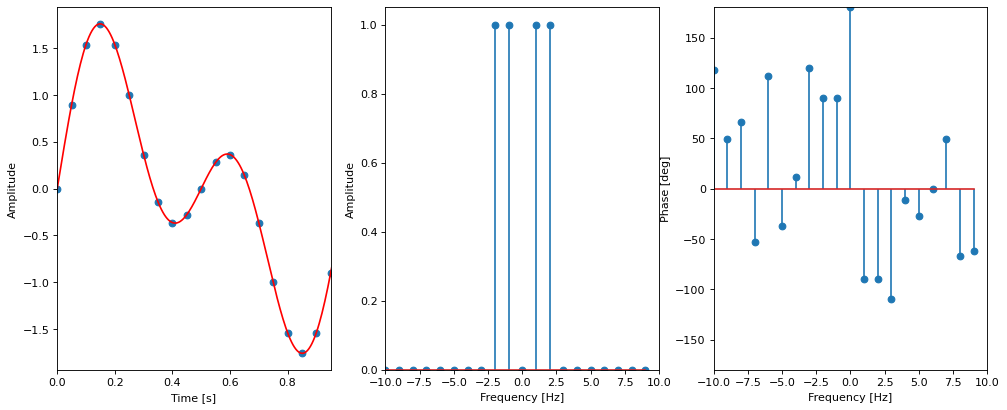

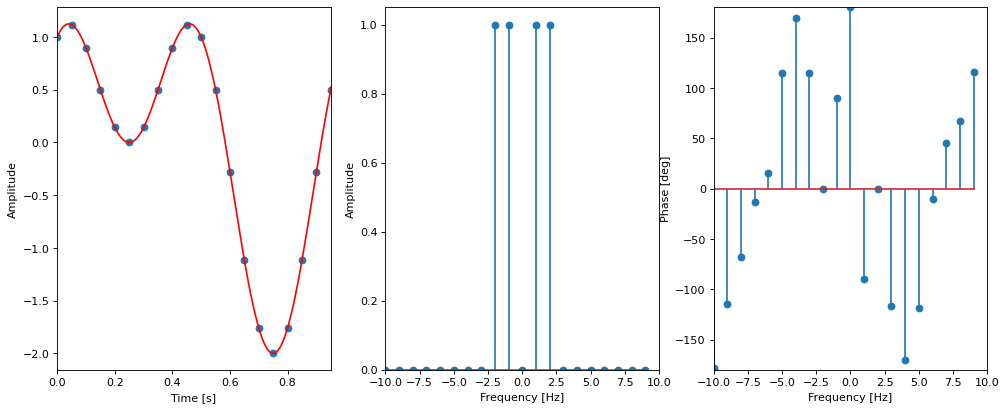

In [23]:
def plot_signal_with_phase(func, x1=0, x2=1, step=0.1):
    xs1 = np.arange(x1, x2, step)
    ys1 = func(xs1)
    N = len(ys1)
    w = 1 / step

    xs2 = np.linspace(x1, x2, 200)
    ys2 = [func(x) for x in xs2]
    
    xs3 = np.fft.fftfreq(N, 1 / w)
    ys3 = np.abs(np.fft.fft(ys1)) * 2 / N
    ys4 = np.angle(np.fft.fft(ys1), deg=True)
    
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(131)
    ax.plot(xs1, ys1, 'o')
    ax.plot(xs2, ys2, '-', color='red')
    ax.set_xlim(0, xs1[-1])
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    
    ax = fig.add_subplot(132)
    plt.stem(xs3, ys3, '-*')
    ax.set_xlim(-w/2, w/2)
    ax.set_ylim(0)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Amplitude')
    
    ax = fig.add_subplot(133)
    plt.stem(xs3, ys4, '-*')
    ax.set_xlim(-w/2, w/2)
    ax.set_ylim(-180,180)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Phase [deg]')
    plt.show()

f=1
T=1
w=20

func1 = lambda t: np.sin(2*np.pi*t*f) + np.sin(4*np.pi*t*f)
plot_signal_with_phase(func1, x2=T, step=1/w)

func2 = lambda t: np.sin(2*np.pi*t*f) + np.cos(4*np.pi*t*f)
plot_signal_with_phase(func2, x2=T, step=1/w)


### 4. Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:
   - import scipy.io.wavfile
   - w, signal = scipy.io.wavfile.read('err.wav')
   - signal = [s[0] for s in signal] #Tylko pierwszy kanał
   - yscale(‘log’)
   - spectrum[::10]  # co 10­ty element

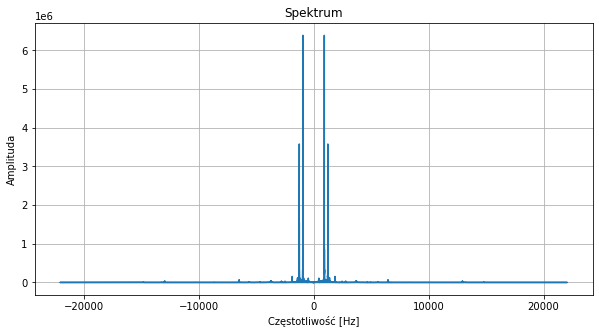

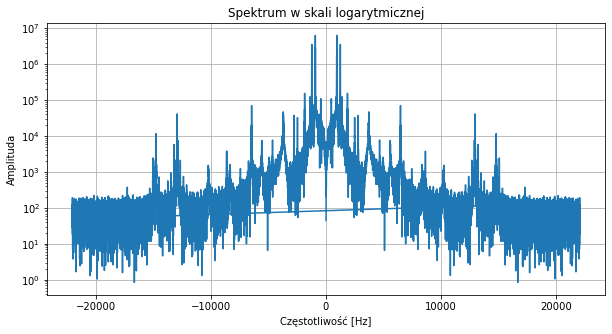

Dominujące częstotliwości:
931.7770522388059 Hz
-931.7770522388059 Hz
930.7486007462686 Hz
-930.7486007462686 Hz
-929.7201492537313 Hz


In [25]:
import scipy.io.wavfile

# wczytanie pliku
w, signal = scipy.io.wavfile.read('err.wav')
signal = [s[0] for s in signal]

# obliczenie FFT sygnału
spectrum = np.fft.fft(signal)
freq = np.fft.fftfreq(len(signal), 1/w)

# spektrum
plt.figure(figsize=(10, 5))
plt.plot(freq, np.abs(spectrum))
plt.title('Spektrum')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# spektrum w skali logarytmicznej
plt.figure(figsize=(10, 5))
plt.plot(freq, np.abs(spectrum))
plt.yscale('log')
plt.title('Spektrum w skali logarytmicznej')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# dominujące częstotliwości
dominant_frequencies = freq[np.abs(spectrum).argsort()[-5:][::-1]]
print("Dominujące częstotliwości:")
for freq in dominant_frequencies:
    print(f"{freq} Hz")


### 5. Za pomocą fft można efektywnie mnożyć duże liczby (lub np. wielomiany). Sprawdź poniższ obliczenia. Jaka jest złożoność obliczeniowa następującej operacji? Uwaga: aby wykonać obliczenia dla większych cyfr, trzeba zaprogramować “promocję” np. [1,2]*[0,6]=[0,6,12], co znaczy [0,6+1,2]=[0,7,2].

In [32]:
from scipy.fft import fft, ifft

a=[1,2,3]
b=[1,2]
print(123*12)

# Należy odpowiednio dobrać “padding”. W przeciwnym wypadku na końcu wyniku pojawią się dodatkowe zera.
A = fft(a,4)
B = fft(b,4)
C = A*B
c = abs(ifft(C))
print(c)

1476
[1. 4. 7. 6.]
